In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

In [90]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_fixed.csv'

In [56]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_radar.csv'

In [190]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_lidar.csv'

In [45]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_22_31_29__30Oct2017.csv'

In [32]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_not_corrected_angles.csv.csv'

In [144]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results.csv'

# files for hand in

In [161]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_23_04_23__30Oct2017.csv'

In [203]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_23_05_32__30Oct2017_lidar.csv'

In [ ]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_23_06_02__30Oct2017_radar.csv

In [204]:
with open(fn, 'r') as f:
    reader = csv.reader(f)
    csv_data = [row for row in reader]

In [205]:
print('using lidar:', csv_data[0][0] == '1')
print('using radar:', csv_data[0][1] == '1')
print('noise a:', csv_data[0][2])
print('noise yawdd:', csv_data[0][3])

using lidar: True
using radar: False
noise a:  3.000000
noise yawdd:  0.392700


In [206]:
data = np.loadtxt(fn, delimiter=',', skiprows=1)

In [207]:
rmse = data[:,:4]
gt = data[:,4:4+4]
est = data[:,8:8+5]
P = data[:,13:-1]
nis = data[:,-2]
sensor = data[:,-1]

In [208]:
rmse_thesholds = [.09, .10, .40, .30]
titles = ['px', 'py', 'vx', 'vy']

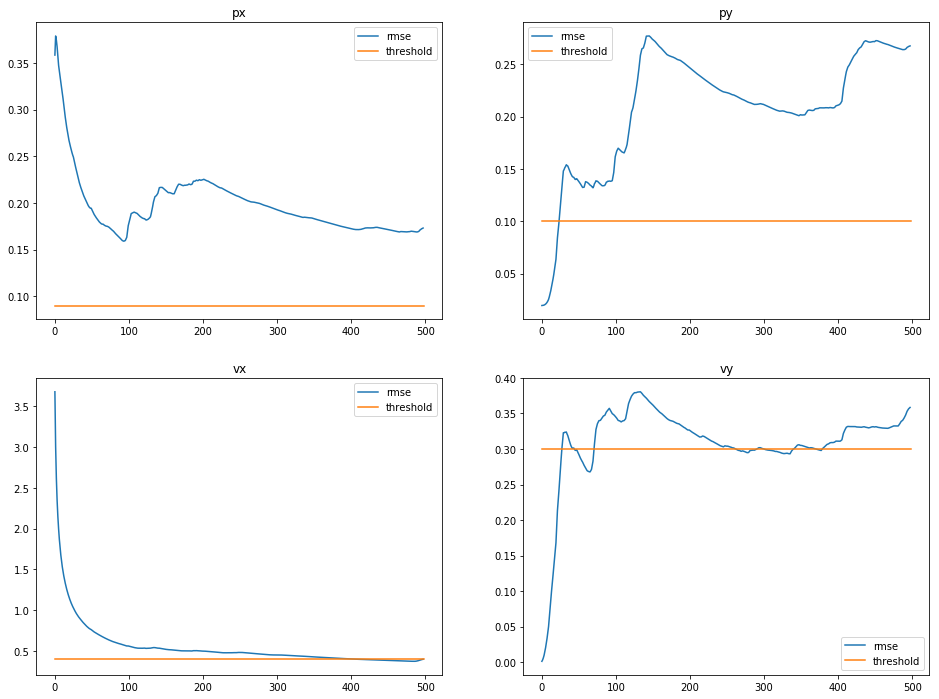

In [209]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(12)
axes = []
axes.extend(row1)
axes.extend(row2)

for ax, col_data, thresh, title in zip(axes, rmse.T, rmse_thesholds, titles):
    ax.plot(col_data, label='rmse')
    ax.plot([0, len(rmse)], [thresh, thresh], label='threshold')
    ax.set_title(title)
    ax.legend()

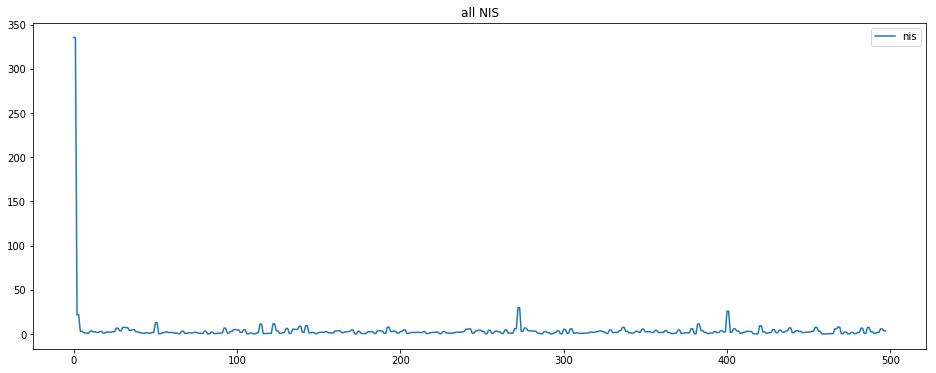

In [210]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(16)
fig.set_figheight(6)


ax1.plot(nis, label='nis')
ax1.set_title('all NIS')
ax1.legend()

lidar samples above threshold:  0.0481927710843


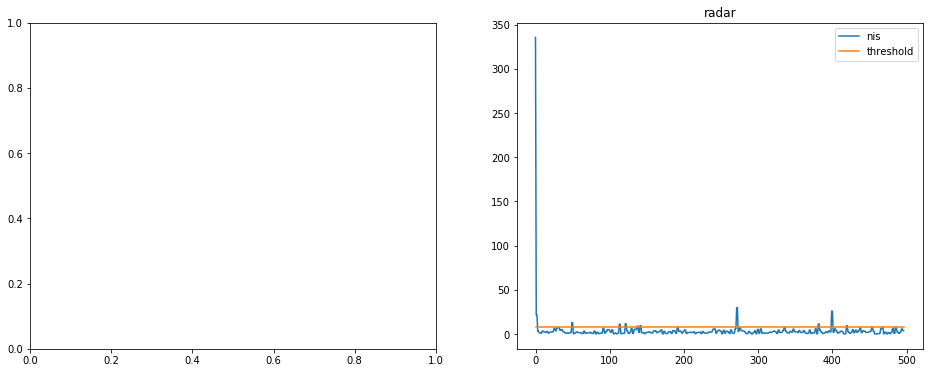

In [211]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(6)


if len(nis[sensor==0]) > 0:
    thresh = 5.991
    ax1.plot(nis[sensor==0], label='nis')
    ax1.plot([0, len(nis[sensor==0])], [thresh, thresh], label='threshold')
    ax1.set_title('radar')
    ax1.legend()
    print('lidar samples above threshold: ', sum(nis[sensor==0] >= thresh) / len(nis[sensor==0]))

if len(nis[sensor==1]) > 0:
    thresh = 7.815
    ary2plot = nis[sensor==1][1:]
    ax2.plot(ary2plot, label='nis')
    ax2.plot([0, len(ary2plot)], [thresh, thresh], label='threshold')
    ax2.set_title('lidar')
    ax2.legend()
    print('lidar samples above threshold: ', sum(nis[sensor==1] >= thresh) / len(nis[sensor==1]))

In [212]:
# maximum distance from origin
dist = [np.sqrt(px**2 + py**2) for px, py in zip(gt[:,0], gt[:,1])]
max(dist)

26.665607813516345

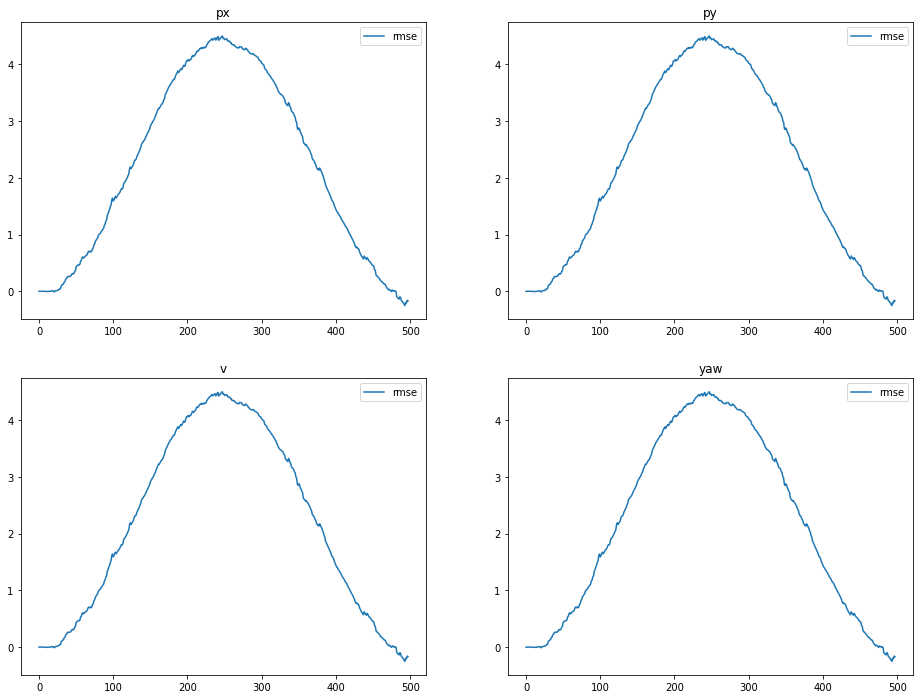

In [213]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(12)
axes = []
axes.extend(row1)
axes.extend(row2)

titles = ['px', 'py', 'v', 'yaw']
for ax, title in zip(axes,titles):
    ax.plot(est[:,i], label='rmse')
    ax.set_title(title)
    ax.legend()

In [214]:
noise_a = 2

In [215]:
t = 1
